# Data preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("data/heart.csv")

# Check for duplicates
data.drop_duplicates(inplace=True)

# Check for nulls
data.isnull().sum()

data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Scale the data

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

processed_data = data.drop(["output"], axis=1)
std_scaler = StandardScaler()

scaled_X = std_scaler.fit_transform(processed_data)
Y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=42)

# Neural Network with tensorflow

In [6]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))




Num GPUs Available:  1


Create the model

In [15]:
model=Sequential()

model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Input layer with 13 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/home/tom/anaconda3/envs/machinelearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.3609 - loss: 0.7761 - val_accuracy: 0.5902 - val_loss: 0.6561
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 0.6559 - val_accuracy: 0.6885 - val_loss: 0.5745
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.5749 - val_accuracy: 0.8197 - val_loss: 0.5106
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.5169 - val_accuracy: 0.8689 - val_loss: 0.4603
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.4663 - val_accuracy: 0.9180 - val_loss: 0.4189
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.4115 - val_accuracy: 0.9016 - val_loss: 0.3894
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3902 - val_accuracy: 0.9016 - val_loss: 0.3689
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 0.3668 - val_accuracy: 0.9016 - val_loss: 0.3556
Epoch 9/100

In [17]:
def plot_graph(history):
    # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

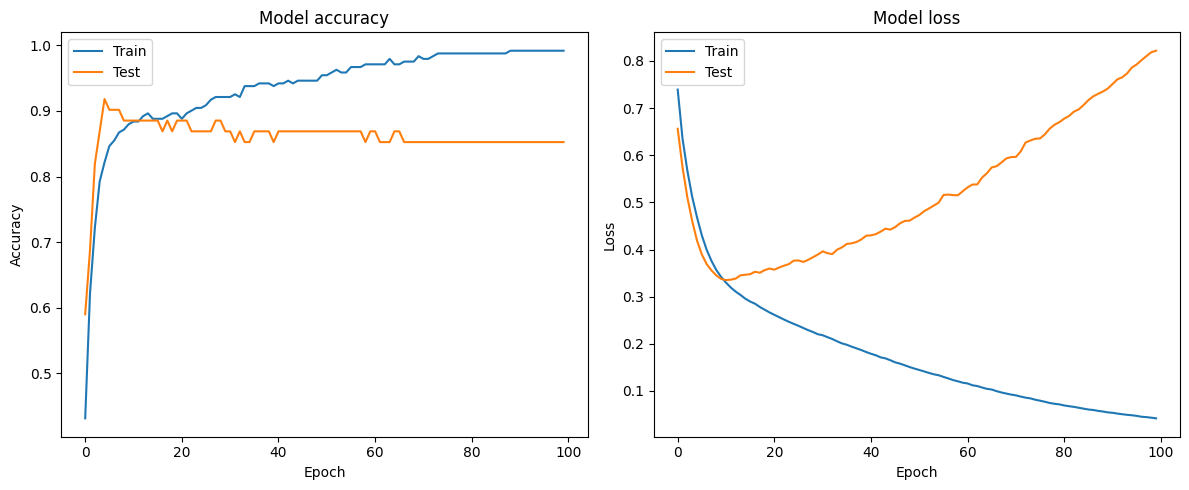

In [18]:
plot_graph(history)